<a href="https://colab.research.google.com/github/fabiornunes/fabiornunes/blob/main/Exemplo_DBSCAN_Dataset_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

In [ ]:
iris = datasets.load_iris()
dados = iris.data

In [ ]:
print(iris.feature_names)

#0 - setosa
#1 - versicolor
#2 - virginica
print(iris.target_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [ ]:
#Dataframe que armazena os atributos das especies de flores, normalmente chamamos esse tipo de dado de variável x
df_flores =pd.DataFrame(iris.data)
df_flores.columns=['sepal_Length','sepal_width','petal_Length','petal_width']
df_flores.head()

,sepal_Length,sepal_width,petal_Length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#Dataframe que armazena os nomes das especies de flores, normalmente chamamos esse tipo de dado de variável y
df_especies=pd.DataFrame(iris.target)
df_especies.columns=['especie']
df_especies.head()

,especie
0,0
1,0
2,0
3,0
4,0


In [ ]:
#Normalização com MinMaxScaler
X = MinMaxScaler().fit_transform(df_flores)
X

In [ ]:
#Primeira Tentativa :'(
db = DBSCAN(eps=0.7, min_samples=5).fit(X)
labels = db.labels_
print(set(labels))

{0}


In [ ]:
#Segunda Tentativa :-/
db = DBSCAN(eps=0.3, min_samples=5).fit(X)
labels = db.labels_
print(set(labels))

{0, 1, -1}


In [ ]:
#Selecionando o melhor valor para o eps
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [ ]:
indices

In [ ]:
distances

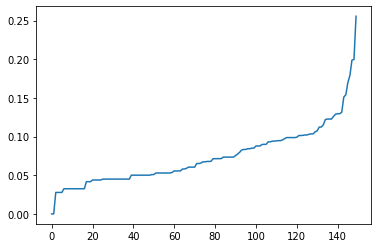

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
#Terceira Tentativa com eps calibrado :-)
db = DBSCAN(eps=0.12, min_samples=5).fit(X)
labels = db.labels_
print(set(labels))

{0, 1, 2, -1}


In [ ]:
df_especies['cluster'] = db.labels_
df_especies.head(200)

,especie,cluster
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,2,2
147,2,2
148,2,2


In [ ]:
y_dbscan = df_especies.cluster.values
y_real = df_especies.especie.values

In [ ]:
#Cria um vetor de cores a serem utilzados na plotagem
colormap=np.array(['Red','green','royalblue', 'maroon'])
colormap

array(['Red', 'green', 'royalblue', 'maroon'], dtype='<U9')

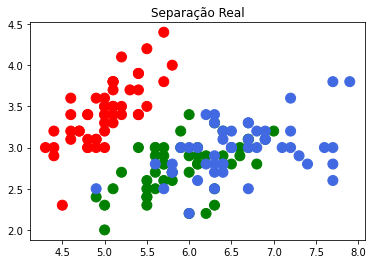

In [ ]:
plt.figure(2)
#Adicona varios pontos na plotagaem utilizando as informações de sepal_Length e sepal_width como coordenadas dos pontos a serem plotados
plt.scatter(df_flores.sepal_Length, df_flores.sepal_width, c=colormap[df_especies.especie], s=100)
plt.title('Separação Real')
plt.show()

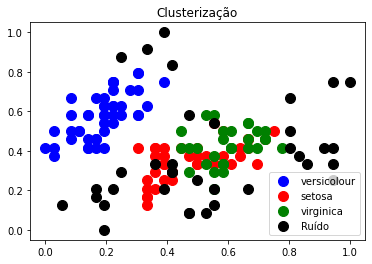

In [ ]:
plt.scatter(X[y_dbscan == 0, 0], X[y_dbscan == 0, 1], s = 100, c = 'blue', label = 'versicolour')
plt.scatter(X[y_dbscan == 1, 0], X[y_dbscan == 1, 1], s = 100, c = 'red', label = 'setosa')
plt.scatter(X[y_dbscan == 2, 0], X[y_dbscan == 2, 1], s = 100, c = 'green', label = 'virginica')
plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], s = 100, c = 'black', label = 'Ruído')
plt.legend()
plt.title('Clusterização')
plt.show()

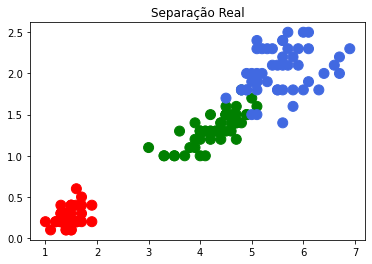

In [ ]:
plt.scatter(df_flores.petal_Length, df_flores.petal_width, c=colormap[df_especies.especie], s=100)
plt.title('Separação Real')
plt.show()

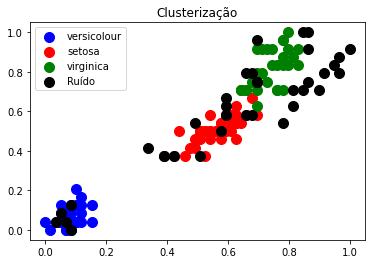

In [ ]:
plt.scatter(X[y_dbscan == 0, 2], X[y_dbscan == 0, 3], s = 100, c = 'blue', label = 'versicolour')
plt.scatter(X[y_dbscan == 1, 2], X[y_dbscan == 1, 3], s = 100, c = 'red', label = 'setosa')
plt.scatter(X[y_dbscan == 2, 2], X[y_dbscan == 2, 3], s = 100, c = 'green', label = 'virginica')
plt.scatter(X[y_dbscan == -1, 2], X[y_dbscan == -1, 3], s = 100, c = 'black', label = 'Ruído')
plt.legend()
plt.title('Clusterização')
plt.show()

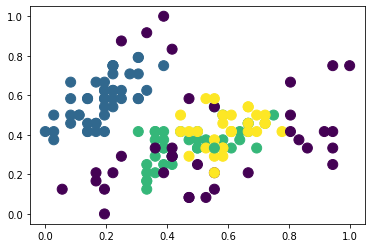

In [ ]:
#OU
plt.scatter(X[:, 0], X[:, 1], s = 100, c = y_dbscan.astype(np.float))

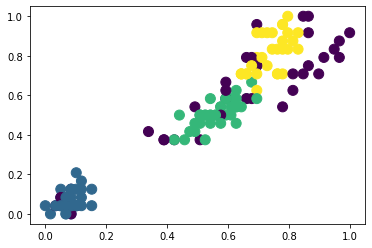

In [ ]:
plt.scatter(X[:, 2], X[:, 3], s = 100, c = y_dbscan.astype(np.float))

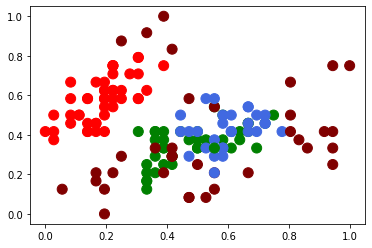

In [ ]:
#OU
vectorizer = np.vectorize(lambda x: colormap[x % len(colormap)])
plt.scatter(X[:, 0], X[:, 1], s = 100, c = vectorizer(y_dbscan))

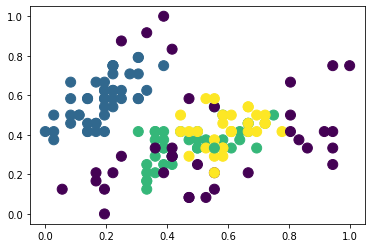

In [ ]:
plt.scatter(X[:,0], X[:, 1], s = 100, c = db.labels_)